In [31]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

In [41]:
#DecisionTree
url = "http://mlr.cs.umass.edu/ml/machine-learning-databases/iris/iris.data"
balance_data = pd.read_csv(url,header=None)
#balance_data.shape
X=balance_data.values[:,0:4]
Y=balance_data.values[:,4]
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=100)
clf_entropy=DecisionTreeClassifier(criterion="entropy",random_state=100,max_depth=5,min_samples_leaf=5)
clf_entropy.fit(X_train,y_train)
y_pred=clf_entropy.predict(X_test)
#y_pred
#accuracy_score(y_test,y_pred)*100

In [38]:
#RandomForest
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
np.random.seed(0)
iris=load_iris()
df=pd.DataFrame(iris.data,columns=iris.feature_names)
df['species']=pd.Categorical.from_codes(iris.target,iris.target_names) 
df['is_train']=np.random.uniform(0,1,len(df)) <= .75
train,test=df[df['is_train']==True],df[df['is_train']==False]
#len(train)
features=df.columns[:4]
y=pd.factorize(train['species'])[0]
#n_jobs to set priority
clf=RandomForestClassifier(n_jobs=2,random_state=0)
clf.fit(train[features],y)
#use the trained classifier to test
clf.predict(test[features])
#view the predicted probablities to arrive the result - Multiple decision trees
clf.predict_proba(test[features])[10:20]
preds=iris.target_names[clf.predict(test[features])]
#Confusion matrix
pd.crosstab(test['species'],preds,rownames=['Actuals'],colnames=['Predicted'])
#Check with values
iris.target_names[clf.predict([[5.0,2.6,1.2,2.1]])]

array(['virginica'], dtype='<U10')

In [1]:
#%matplotlib inline
#import matplotlib.pyplot as plt
#import seaborn as sns; sns.set()
#from sklearn.datasets import fetch_20newsgroups
#data=fetch_20newsgroups()

In [13]:
categories=data.target_names
train=fetch_20newsgroups(subset='train', categories=categories)
test=fetch_20newsgroups(subset='test', categories=categories)
#print (train.data[5])
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
#words are weighted
model=make_pipeline(TfidfVectorizer(),MultinomialNB())
model.fit(train.data,train.target)
labels=model.predict(test.data)

In [ ]:
from sklearn.metrics import confusion_matrix
#confusion marix - to check how confused is the answer?
mat=confusion_matrix(test.target,labels)
sns.heatmap(mat.T,xticklabels=train.target_names,yticklabels=train.target_names,square=True,annot=True,cbar=False,fmt='d')
plt.xlabel('true label')
plt.ylabel('predicted label')
#validation
def pred_category(s,train=train,model=model):
    pred=model.predict([s])
    print(pred)
    return train.target_names[pred[0]]
pred_category('Space station')
#train.target_names[1]

In [15]:
#Linear Regression - To be tested after having the data
import numpy as np
import pandas as pd
companies=pd.read_csv('1000_Companies.csv')
X=companies.iloc[:,:-1].values
Y=companies.iloc[:,4].values
#print(X)
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
labelencoder=LabelEncoder()
X[:,3]=labelencoder.fit_transform(X[:,3])
onehotencoder=OneHotEncoder(categorical_features=[3])
X=onehotencoder.fit_transform(X).toarray()
#print(X)
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=0)
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train)
y_predict=regressor.predict(X_test)
#y_predict
#print(regressor.coef_)
#print(regressor.intercept_)
from sklearn.metrics import r2_score
r2_score(y_test,y_predict)

0.9112695892268783

In [ ]:
#LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns;
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn import metrics
%matplotlib inline
digits=load_digits()
digits.target.shape
plt.figure(figsize=(20,4))
#Display numbers in pixel forms
#for index,(image,label) in enumerate(zip(digits.data[0:5],digits.target[0:5])):
#    plt.subplot(1,5,index+1)
#    plt.imshow(np.reshape(image,(8,8)), cmap=plt.cm.gray)
#    plt.title('Training: %i\n' %label, fontsize=20)
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(digits.data,digits.target,test_size=0.23,random_state=2)   
X_test.shape
from sklearn.linear_model import LogisticRegression
regr=LogisticRegression()
regr.fit(X_train,y_train)
#print(regr.predict(X_test[0].reshape(1,-1))) #reshape to onedimesional
regr.predict(X_test[0:10])
score=regr.score(X_test,y_test)
#score
predictions=regr.predict(X_test)
cm=metrics.confusion_matrix(y_test,predictions)
cm #displays the confusion matrix
plt.figure(figsize=(9,9))
sns.heatmap(cm,annot=True,fmt=".3f",linewidths=.5,square=True,cmap='Blues_r')
plt.ylabel('Actuals')
plt.xlabel('Predicted')
all_sample_title='Accuracy score {0}'.format(score)
plt.title(all_sample_title,size=15)

In [37]:
#Knn
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
dataset=pd.read_csv('diabetes.csv')
#len(dataset)
zero_not_accepted=['Glucose','BloodPressure','SkinThickness','BMI','Insulin']
for column in zero_not_accepted:
    dataset[column]=dataset[column].replace(0,np.NaN)
    mean=int(dataset[column].mean(skipna=True))
    dataset[column]=dataset[column].replace(np.NaN,mean)
X=dataset.iloc[:,0:8]
y=dataset.iloc[:,8]
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0,test_size=0.2)
sc_X=StandardScaler()
#print(X_train)
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.fit_transform(X_test)
#print(X_train)
import math
math.sqrt(len(y_test))
classifier=KNeighborsClassifier(n_neighbors=11,p=2,metric='euclidean')
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
#print(cm) 
#print(f1_score(y_test,y_pred))
#print(accuracy_score(y_test,y_pred))

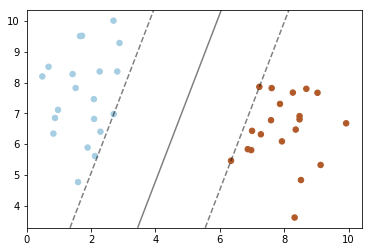

In [59]:
#SVM
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets.samples_generator import make_blobs
X,y=make_blobs(n_samples=40,centers=2,random_state=20)
clf=svm.SVC(kernel='linear',C=1000)
clf.fit(X,y)
#plot
plt.scatter(X[:,0],X[:,1],c=y, s=30,cmap=plt.cm.Paired)
#plt.show()
ax=plt.gca()
xlim=ax.get_xlim()
ylim=ax.get_ylim()
xx=np.linspace(xlim[0],xlim[1],30)
yy=np.linspace(ylim[0],ylim[1],30)
YY,XX=np.meshgrid(yy,xx)
xy=np.vstack([XX.ravel(), YY.ravel()]).T
Z=clf.decision_function(xy).reshape(XX.shape)
ax.contour(XX,YY,Z,colors='k',levels=[-1,0,1],alpha=0.5,linestyles=['--','-','--'])
ax.scatter(clf.support_vectors_[:,0],clf.support_vectors_[:,1],s=100,linewidths=1,facecolors='none')
plt.show()
#newData=[[3,4],[5,6]]
#print(clf.predict(newData))
